<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [7]:
import newsight as ns

import pandas as pd
import numpy as np
import pickle
import re

In [164]:
# 불러오기
loader = ns.Pickle2DF()
df = loader.get_dataframe('data/미래에셋대우/rawdata_미래에셋대우.pickle')

In [165]:
preprocessor.help()

******PreprocessingText******
1) make_content_re(df['컬럼이름'](Series)) : 입력받은 열을 전처리 후 시리즈로 반환
2) add_noun_dict('list') : 명사 사전에 단어 추가
3) add_stopwords('list') : 불용어 사전에 단어 추가
4) tokenize(df['컬럼이름'](Series)) : 입력받은 열을 토큰화한 후 시리즈로 반환
*****************************


In [166]:
# 단어사전추가
preprocessor = ns.PreprocessingText()

filename = '미래에셋_단어사전.txt'
with open(filename) as file_object:
    contents = file_object.read()
noun_list = contents.split('\n')
preprocessor.add_noun_dict(noun_list)

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


추가한 명사
['정보통신', '환헤지', '조웅기', '핀테크', '큐레이션', '투명성', '최경주', '상장', '임직원', '아시아그로쓰', '라이징스타', '파이낸셜', '캡스', '리파이낸싱', '싱가포르투자청', '도이체방크', '도이치뱅크', '카우룽', '그린마크', '광주은행', '대신증권', '삼성생명', '신한은행', '우리은행', '유안타증권', '펀드슈퍼마켓', '한국투자증권', '기업은행', '하나은행', '제일은행', '퀀트모델', '포트폴리오', '헤지펀드', '트레이딩', '영업점', '셀렉션', '구인', '사업화', '협약식', '미래에셋센터원', '최연소', '이테크', '미래에셋', '미래에셋대우', '에트리홀딩스', '펀드설정액', '분기', '벤처', '사회적기업', '성장지원', '헬스케어', '해결책', '메리츠', '신고가', '지주', '증권주', '벨류에이션', '이베스트', '수익성', '실사구시', '페어트레이딩', '쓸어', '상장사', '한투', '한국투자증권', '순매수', '거래량', '상장주식수', '분기', '미상환', '업무지구', '장기적', '한온시스템', '보여', '주간사', '젠바디', '예탁결제원', '크라우드펀딩', '영업이익률', '이익률', '파워리퍼블릭', '운용사', '아모텍', '지분', '박스권', '저평가', '시총', '긍정적', '납세자', '셀리드', '에스퓨얼셀', '게임사', '할인율', '재도전', '인공지능', '당기순익', '비대면', '사업가치', '재평가', '순매도', '순매수', '수혜주', '마중물', '혼조세', '신고가', '합리적', '재취업', '다각화', '자문형랩', '순익', '설정액', '원소재', '메디톡스', '인허가', '성장통', '호실적', '주간사', '주관사', '예상치', '호실적', '압도', '신성장', '기술료', '조기상환', '비임원', '기대감', '순매도', '저평가', '거래량', '내수', '건설사', 

In [167]:
# 제목에 '미래에셋'이 들어간 문서만 추출
picker = ns.GetDocsFromQuery()

picker.set_query('미래에셋')
idx = picker.select_news(df, title = True)
df = df.loc[idx,:].copy(deep = True)

tmp_idx = []
for i in df.index.tolist():
    if '[ET투자뉴스]' not in df.loc[i]['title'] : tmp_idx.append(i)

df = df.loc[tmp_idx,:].copy(deep = True)

length of selected news: 2172
length of original data: 10000


In [168]:
# 전처리
re = preprocessor.make_content_re(df['content'])
tk = preprocessor.tokenize(re)

df['content_tk'] = tk

추가한 명사: ['정보통신', '환헤지', '조웅기', '핀테크', '큐레이션', '투명성', '최경주', '상장', '임직원', '아시아그로쓰', '라이징스타', '파이낸셜', '캡스', '리파이낸싱', '싱가포르투자청', '도이체방크', '도이치뱅크', '카우룽', '그린마크', '광주은행', '대신증권', '삼성생명', '신한은행', '우리은행', '유안타증권', '펀드슈퍼마켓', '한국투자증권', '기업은행', '하나은행', '제일은행', '퀀트모델', '포트폴리오', '헤지펀드', '트레이딩', '영업점', '셀렉션', '구인', '사업화', '협약식', '미래에셋센터원', '최연소', '이테크', '미래에셋', '미래에셋대우', '에트리홀딩스', '펀드설정액', '분기', '벤처', '사회적기업', '성장지원', '헬스케어', '해결책', '메리츠', '신고가', '지주', '증권주', '벨류에이션', '이베스트', '수익성', '실사구시', '페어트레이딩', '쓸어', '상장사', '한투', '한국투자증권', '순매수', '거래량', '상장주식수', '분기', '미상환', '업무지구', '장기적', '한온시스템', '보여', '주간사', '젠바디', '예탁결제원', '크라우드펀딩', '영업이익률', '이익률', '파워리퍼블릭', '운용사', '아모텍', '지분', '박스권', '저평가', '시총', '긍정적', '납세자', '셀리드', '에스퓨얼셀', '게임사', '할인율', '재도전', '인공지능', '당기순익', '비대면', '사업가치', '재평가', '순매도', '순매수', '수혜주', '마중물', '혼조세', '신고가', '합리적', '재취업', '다각화', '자문형랩', '순익', '설정액', '원소재', '메디톡스', '인허가', '성장통', '호실적', '주간사', '주관사', '예상치', '호실적', '압도', '신성장', '기술료', '조기상환', '비임원', '기대감', '순매도', '저평가', '거래량', '내수', '건설사',

In [169]:
cleaner = ns.CleaningNoise()
# 본문에 미래에셋 대우가 3번 이상 들어간 문서 추출
count_list = cleaner.count_topic(df['content_tk'],'미래에셋')
proper_idx = cleaner.get_proper_news(df['content_tk'],count_list,3).index

number of total data: 1317
number of proper data: 189


In [170]:
df_proper = df.loc[proper_idx].copy()

In [171]:
def view(num) :
    print(f'conten{num} : {df_proper.content.iloc[num]}')
    print(f'tok{num} : {df_proper.content_tk.iloc[num]}')

In [172]:
view(100)

conten100 : [머니투데이 전병윤 기자] 최현만 미래에셋대우 수석부회장(사진 왼쪽 6번째)과 권용원 금융투자협회장(왼쪽 5번째), 정유신 한국핀테크지원센터장(왼쪽 7번째)이 참석한 가운데 미래에셋대우가 지난 18일 포시즌스 서울 호텔에서 '미래에셋 디지털 혁신 플랫폼 출범 및 핀테크 허브 업무 협약식'을 개최했다. /사진제공=미래에셋대우미래에셋대우가 지난 18일 포시즌스 서울 호텔에서 '미래에셋 디지털 혁신 플랫폼 출범 및 핀테크 허브 업무 협약식'을 성공적으로 개최했다고 19일 밝혔다.

이번 행사에 최현만 미래에셋대우 수석부회장과 송준상 금융위원회 상임위원(CFO), 권용원 금융투자협회장, 김대윤 한국핀테크산업협회장, 전길수 금융감독원 선임국장, 정유신 한국핀테크지원센터장 등 다양한 분야의 핀테크 산업 관계자들이 참석했다.
 
출범식에서는 금융과 정보기술(IT)을 결합한 '핀테크' 기업과 동반 성장을 추구하는 '미래에셋 디지털 혁신 플랫폼'을 소개했다. 기존 협약식과 다르게 디지털 서명을 통해 제휴 기관과 업무 협약식을 진행했다. 

이번 협약 체결로 미래에셋대우는 코트라(KOTRA), 한국인터넷진흥원, 서울대기술지주회사, 고려대기술지주회사, 코스콤, KT, PwC, 스파크랩, KIC실리콘밸리, KIC워싱턴과 업무 협약을 체결해 총 12개 기관이 핀테크 허브 제휴사로 상호 협력하게 됐다.

최현만 수석부회장은 "미래에셋 디지털 혁신 플랫폼은 증권사 단독으로는 최초로 운영하는 핀테크 지원 프로그램"이라며 "핀테크 파트너십 프로그램에 참여하는 핀테크 기업이 대한민국을 넘어 글로벌 유니콘 기업으로 성장할 수 있도록 투자와 지원을 아끼지 않겠다"고 말했다.

한편, 미래에셋대우는 핀테크 허브의 네트워크를 글로벌 금융 기관 등으로 지속적으로 확대해 나갈 예정이다. 제휴 기관은 글로벌 핀테크 동향을 공유하고 핀테크 기업의 투자 유치와 글로벌 진출을 지원하는 등 네트워크를 구축할 방침이다.
tok100 : ['머니투데이', '최현', '미래에셋대우', '수석',

* 카테고리는 A>B 형태다.
    * A : 경제 IT 문화 국제 사회 지역 정치 스포츠
        * 경제 > 산업_기업, 증권_증시, 금융_재테크, 서비스_쇼핑, 유통, 취업_창업, 경제일반, 반도체, 자동차, 부동산, 자원, 외환, 무역
    * B : 산업 증권 국제경제 등 61개 카테고리 존재. 산업 증권 국제경제 금융이 70%

In [27]:
import re

In [28]:
# A > B,  A 카테고리 분포 확인
tmp = df['category'].apply(lambda x : ' '.join(x)) # list to string
# A > B => A
regex = re.compile('\>\w+')
tmp_2 = tmp.apply(lambda x : re.sub(regex,'',x))
# _B 제거
regex_2 = re.compile('\_\w+')
tmp_3 = tmp_2.apply(lambda x : re.sub(regex_2,'',x))

# 결측치 확인-> 99개 제거
nas = tmp_3[tmp_3.apply(len)==0] 
print(nas.shape)
tmp_4 = tmp_3.drop(nas.index)

# 하나의 리스트로 만들고 분포 확인
tmp_5 = pd.Series(' '.join(tmp_4.tolist()).split(' '))
tmp_5.value_counts()

(99,)


경제     2600
IT      287
문화       86
국제       56
사회       37
지역       35
정치       13
스포츠      10
dtype: int64

In [29]:
cat_names = tmp_5.unique()
cat_names

array(['경제', '국제', 'IT', '문화', '지역', '사회', '정치', '스포츠'], dtype=object)

In [30]:
# A > B,  B 카테고리 분포 확인
tmp = df['category'].apply(lambda x : ' '.join(x)) # list to string
# A > B => A
regex = re.compile('\w+\>')
tmp_2 = tmp.apply(lambda x : re.sub(regex,'',x))
# _B 제거
regex_2 = re.compile('\_\w+')
tmp_3 = tmp_2.apply(lambda x : re.sub(regex_2,'',x))

# 결측치 확인-> 99개 제거
nas = tmp_3[tmp_3.apply(len)==0] 
print(nas.shape)
tmp_4 = tmp_3.drop(nas.index)

# 하나의 리스트로 만들고 분포 확인
tmp_5 = pd.Series(' '.join(tmp_4.tolist()).split(' '))
tmp_5.value_counts()

(99,)


산업        631
증권        545
국제경제      520
금융        507
서비스       177
인터넷       116
유통         81
모바일        50
과학         44
콘텐츠        41
전시         38
취업         36
경제일반       34
문화일반       28
IT         26
반도체        25
사회일반       19
국제일반       19
자동차        15
지역일반       13
부동산        13
유럽         12
아시아        11
보안         10
자원         10
중국         10
정치일반        7
사건          7
올림픽         6
방송          6
         ... 
외환          5
학술          4
출판          4
경기          3
전남          3
북한          3
영화          3
미국          3
미디어         3
강원          2
노동          2
대구          2
외교          2
의료          2
장애인         2
미술          2
광주          2
교육          2
부산          2
메이저리그       1
스포츠일반       1
한국프로야구      1
경북          1
무역          1
중남미         1
충북          1
청와대         1
생활          1
전북          1
농구          1
Length: 61, dtype: int64

In [31]:
# 경제>B 에 속하는 B의 수 확인
tmp_2 = tmp.apply(lambda x:re.findall(r"경제\>\w+",x))
tmp_3 = tmp_2.apply(lambda x:' '.join(x))
tmp_4 = tmp_3.apply(lambda x: re.sub(r'\w+\>','',x))
tmp_4 = tmp_4.drop(tmp_4[tmp_4.apply(len)==0].index)
tmp_5 = pd.Series(' '.join(tmp_4.values.tolist()).split(' '))
tmp_5.value_counts()

산업_기업     631
증권_증시     545
국제경제      520
금융_재테크    507
서비스_쇼핑    177
유통         81
취업_창업      36
경제일반       34
반도체        25
자동차        15
부동산        13
자원         10
외환          5
무역          1
dtype: int64

In [32]:
eco_cat_rank = tmp_5.value_counts().index.tolist()

* 카테고리 길이는 1-3 까지
* 대부분이 3개

In [33]:
# 카테고리 길이 분포
df['category'].apply(len).value_counts()

3    845
2    216
1    157
0     99
Name: category, dtype: int64

In [34]:
# 길이가 1인 카테고리
cat = df['category'].copy()
cat_len_1 = cat[cat.apply(len)==1]
cat_len_1

5            [경제>산업_기업]
10          [경제>금융_재테크]
11          [경제>금융_재테크]
167          [경제>산업_기업]
239     [IT_과학>인터넷_SNS]
253           [경제>경제일반]
259           [경제>경제일반]
267          [경제>산업_기업]
466          [문화>전시_공연]
529           [사회>사회일반]
531           [사회>사회일반]
538          [경제>산업_기업]
553          [경제>산업_기업]
733           [경제>경제일반]
885          [국제>유럽_EU]
1145          [사회>사회일반]
1151         [문화>방송_연예]
1154         [경제>산업_기업]
1255         [경제>산업_기업]
1274         [경제>산업_기업]
1316         [문화>전시_공연]
1332         [문화>전시_공연]
1435         [경제>증권_증시]
1624          [국제>국제일반]
1625          [경제>경제일반]
1896            [국제>중국]
1900         [경제>산업_기업]
1916        [IT_과학>모바일]
1959         [문화>전시_공연]
1965         [경제>증권_증시]
             ...       
8738         [IT_과학>과학]
8753          [문화>문화일반]
8756          [문화>문화일반]
8783          [지역>지역일반]
8790          [지역>지역일반]
8797          [지역>지역일반]
8853         [경제>산업_기업]
8854          [문화>문화일반]
8855         [경제>산업_기업]
8876        [경제>서비스_쇼핑]
8899         [경제

In [35]:
# 길이가 2인 카테고리
cat_len_2 = cat[cat.apply(len)==2]
cat_len_2

# 길이가 3인 카테고리
cat_len_3 = cat[cat.apply(len)==3]
cat_len_3

4               [경제>산업_기업, 경제>증권_증시, 경제>국제경제]
18             [경제>증권_증시, 경제>국제경제, 경제>금융_재테크]
20             [경제>국제경제, 경제>금융_재테크, 경제>산업_기업]
21               [경제>금융_재테크, 경제>증권_증시, 경제>유통]
22             [경제>금융_재테크, 경제>국제경제, 경제>증권_증시]
23             [경제>국제경제, 경제>금융_재테크, 경제>산업_기업]
24             [경제>금융_재테크, 경제>산업_기업, 경제>국제경제]
27           [경제>금융_재테크, 경제>서비스_쇼핑, 경제>증권_증시]
28             [경제>금융_재테크, 경제>산업_기업, 경제>국제경제]
32                [경제>국제경제, 경제>금융_재테크, 국제>중국]
40                [국제>중국, 경제>국제경제, 경제>금융_재테크]
42             [경제>국제경제, 경제>금융_재테크, 경제>산업_기업]
50             [경제>국제경제, 경제>금융_재테크, 경제>산업_기업]
51             [경제>증권_증시, 경제>국제경제, 경제>금융_재테크]
57             [경제>국제경제, 경제>금융_재테크, 경제>산업_기업]
59       [경제>증권_증시, IT_과학>인터넷_SNS, 경제>금융_재테크]
69         [IT_과학>인터넷_SNS, 경제>국제경제, 경제>증권_증시]
71         [경제>국제경제, IT_과학>인터넷_SNS, 경제>산업_기업]
75         [경제>국제경제, IT_과학>인터넷_SNS, 경제>산업_기업]
79         [IT_과학>인터넷_SNS, 경제>국제경제, 경제>증권_증시]
85                [경제>증권_증시, 경제>국제경제, 경제>반도체]
90             [경제>국제경제, 경제>증권_증시,

* 카테고리 선정 1)
* 경제 외의 카테고리가 존재하면 대분류 카테고리로 잡는다, 나머지는 경제

In [36]:
# cat 결측치 제거
cat_0 = df_proper[df_proper['category'].apply(len) == 0].index
df_proper = df_proper.drop(cat_0).copy()

In [37]:
# A>B 에서 >B 제거
def removeSubCat(cats):
    tmp = []
    for cat in cats:
        tmp.append(re.sub(r'\>\w+','',cat))
    return list(set(tmp)) # 중복 제거

In [38]:
cat_1 = df_proper['category'].apply(lambda x : removeSubCat(x))

In [39]:
# 경제 외의 카테고리가 존재하면 그것으로 대체
# 경제 외의 카테고리가 2개 이상 존재하면 not_eco 리스트에서 순서가 먼저인것으로 대체
def getCat(cats):
    not_eco = ['IT_과학','사회','국제','문화','스포츠']
    if len(cats) == 1 : return cats[0]
    else:
        for minor_cat in not_eco:
            if minor_cat in cats : return minor_cat
        return '경제'

In [40]:
cat_2 = cat_1.apply(lambda x : getCat(x))
df_proper['cat_2'] = cat_2

In [41]:
df_proper['cat_2'].value_counts()

경제       528
IT_과학    125
국제        25
사회        20
문화        13
지역         7
정치         2
스포츠        1
Name: cat_2, dtype: int64

In [42]:
cat_names = df_proper['cat_2'].value_counts().index.tolist()
for cat in cat_names:
    print(f'{cat}')
    display(df_proper[df_proper['cat_2']==cat]['title'])

경제


4                   미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼
5                       미래에셋대우-에트리홀딩스, 중소·벤처기업 성장지원 업무 협약
6                  미래에셋대우, 에트리홀딩스와 `중소·벤처기업 성장 지원` MOU 체결
20                            홍콩 오피스 빌딩에 2800억 투자한 미래에셋대우
21                     미래에셋대우, 우량 헤지펀드에 분산투자, 변동성 장세에서 강점
22                   미래에셋자산운용, 단기채권 투자·주식 페어트레이딩 ‘쌍끌이 전략’
23                            홍콩 오피스 빌딩에 2800억 투자한 미래에셋대우
24                                     해외 부동산 쓸어담는 미래에셋대우
27            [마켓인사이트]투자실탄 끌어모으는 미래에셋대우, 또 다시 해외채권 발행 나선다
28                                  해외 부동산 투자 속도내는 미래에셋대우
42                 미래에셋, 홍콩 신흥업무지구 친환경건물 메자닌대출에 2800억원 투자
47                       미래에셋대우, 홍콩 구룡반도 오피스빌딩에 2800억원 투자
50                         미래에셋대우, 홍콩 구룡반도 오피스빌딩 2800억 투자
51                           "미래에셋대우, 올해 실적 개선 기대…목표가 하향"
57                               미래에셋대우, '생명' 주식 매일 담는 까닭
90                          1위 턱밑추격 미래에셋 PBS, 상반기 삼성 추월하나
93                          1위 턱밑추격 미래에셋 PBS, 상반기 삼성 추월하나
98            

IT_과학


59                                   미래에셋의 야심작 '클라우드 ETF'
69                           미래에셋 미국 운용사, 클라우드 컴퓨팅 ETF 상장
71                           미래에셋, 美 나스닥서 클라우드 컴퓨팅 ETF 상장
75                           미래에셋 美 운용사 글로벌X, 클라우드 ETF 상장
127            미래에셋대우, 전략 선택 가능한 `Global X 포트폴리오 자문형랩` 출시
128       미래에셋대우, 두 가지 전략 선택 가능한 `Global X 포트폴리오 자문형랩` 출시
131                           미래에셋대우, 글로벌 X 포트폴리오 자문형랩 출시
383                      온라인 펀드 8700억원 돌파…미래에셋대우, 증권업계 1위
394               미래에셋대우, 온라인전용펀드 설정액 8700억원 돌파…"증권업계 1위"
479                        미래에셋대우 계좌 새로 개설하고 QM6 받은 투자자는?
497                                    미래에셋생명, 특별관계자 지분변동
634               "삼성전자, 1분기 영업익 종전보다 6.1% 하향 조정"<미래에셋대우>
653                  미래에셋대우, 무료 온라인 서비스 '엠클럽' 가입자 10만명 돌파
654                          미래에셋대우, `m.Club` 가입자 10만명 돌파
718                              미래에셋박현주재단, 이중언어교재 전자책 개발
719                              미래에셋박현주재단, 이중언어교재 전자책 개발
834                     미래에셋대우, 최소가입액 10만원 ELS 출시기념 행사 실시
922           

국제


32                         미래에셋대우, 홍콩 랜드마크 오피스에 2800억원 투자
40                           미래에셋대우, 홍콩 오피스 빌딩에 2800억원 투자
555                    박현주 미래에셋회장 “올해 일본 진출하고 中-印 사업도 확대”
885                             1조원 佛 ‘마중가 타워’ 미래에셋대우 품으로
893                            '佛 랜드마크' 마중가타워…미래에셋대우가 품는다
898                           미래에셋대우, 프랑스 파리 '마중가 타워' 품는다
900                             1조원 파리 마중가타워, 미래에셋대우가 품었다
1903            미래에셋대우 홍콩법인, 中 유니콘기업 홍콩 IPO 공동주관…기업가치 1조원
1970                              미래에셋대우, 홍콩법인에 5000억원 출자
1974                                미래에셋대우, 런던서 돈빼 홍콩 보낸다
6598                    미래에셋대우-NH證, 런던 오피스 1130억 메리츠에 재매각
7576    [증시 변곡점 투자법] (7) 구용욱 미래에셋대우 리서치센터장 | 경제 부활하는 일...
7837    [마켓인사이트]미래에셋, 블랙스톤으로부터 영국 런던 최고급 오피스 빌딩 5000억원...
8184                                미래에셋대우, 홍콩 빌딩에 3억弗 투자
8840         국내 1·2위 증권사인 미래에셋대우·NH, 런던 오피스 빌딩 3800억원에 매입
8904                        미래에셋대우, 美 지주사에 3007억 규모 현물 출자
8946             박현주 미래에셋대우 회장, 홍콩법인 회장 취임...'해외사업 직접 지휘'
9164          

사회


529     미래에셋대우 사외이사 2명, 주총 재선임 직후 "그만두겠다" 사임
531             미래에셋대우, 권태균·박찬수 사외이사 사의 받아들여
535      [단독] 옛 미래에셋대우 직원 금품수수 적발…과태료 5000만원
1145                        미래에셋대우, 전자투표 설명회
1628         미래에셋대우, 지난해 시장하락 여파..세전이익 12% ↓
1972                 미래에셋대우 합병 후 첫 290명 희망퇴직
1989     미래에셋대우, 합병 후 첫 희망퇴직…업계 최대 규모 교육비 지원
2165        미래에셋대우, 임금피크제 합의…희망퇴직 D-3 앞두고 술렁
2685     [재계톡톡] KB 이어 미래에셋도 희망퇴직 소문…뒤숭숭한 증권가
2697         저축은행연합회·미래에셋대우… 저축은행 정기예금 업무 협약
3115           미래에셋대우 노조, 구조조정 반발 컨테이너 농성 돌입
3543           미래에셋대우, 제너럴바이오와 IPO 대표주관계약 체결
3956         미래에셋대우, 손실시 해외주식 지급 ELS 등 9종 판매
4066        미래에셋대우, 손실시 해외주식 지급 ELS 등 10종 판매
4092                  이번엔 미래에셋대우…금감원, 종합업무검사
4252                미래에셋대우, HTS 먹통…"문제 파악 중"
7190                 공정위, 미래에셋 일감 몰아주기 조사 착수
7210                  공정위, 미래에셋 일감 몰아주기 현장조사
9385              로또 사업자 '3파전'…미래에셋·K뱅크도 나선다
9612             미래에셋대우 고객센터, 고참 직원 불만 많은 사연
Name: title, dtype: object

문화


154     홍성국 전 미래에셋대우 사장 "벤처기업 육성 절박함이 '수축사회' 막을 것"
931              미래에셋은퇴연구소, 내달 6일 ‘행복한 은퇴 발전소’ 세미나
3766            미래에셋대우, 핀테크 파트너십 프로그램 1기 성과 발표회 성료
3919                  미래에셋대우, 24일 전국 동시 자산관리세미나 개최
5274                       미래에셋대우, 제18회 금융드림콘서트 개최
6992                  휠라코리아, 중국 성장세 지속…목표가↑-미래에셋대우
7209                미래에셋대우 WM센터원, 조명숙 작가 작품 전시회 개최
8313                    미래에셋대우, 한티역·홍제동WM 투자설명회 개최
8753              미래에셋은퇴연구소, '찾아가는 행복한 은퇴 발전소' 세미나
8756           미래에셋은퇴연구소, ‘찾아가는 행복한 은퇴 발전소’ 세미나 개최
8768           미래에셋은퇴연구소, ‘찾아가는 행복한 은퇴 발전소’ 세미나 개최
9232                   미래에셋대우, 홍제동WM·평택WM 투자설명회 개최
9815                 미래에셋대우, 강서중앙WM·홍제동WM 투자설명회 개최
Name: title, dtype: object

지역


251              미래에셋그룹, 강원 산불피해 성금 5억원 기부
2023    금호타이어-미래에셋대우, '광주공장 이전' 위한 업무제휴 협약
7516      미래에셋박현주재단, 홍천 중학생과 청소년 금융진로캠프 개최
7523              미래에셋대우, 희망체인리더 1기 발대식 개최
7833      미래에셋대우 "고객자산관리 전문가 'PB이사' 신규 선임"
8783     미래에셋대우, `2018 퇴직연금 세미나` 전국 6곳서 개최
8797              미래에셋대우, 2018 퇴직연금 세미나 개최
Name: title, dtype: object

정치


3764              미래에셋대우, 핀테크 스타트업과 성과 발표회
4228    미래에셋대우, 차세대 시스템 첫날 먹통…"현재 정상 작동 중"
Name: title, dtype: object

스포츠


5954    미래에셋대우 장우진, 코리아오픈 탁구 사상 첫 3관왕
Name: title, dtype: object

* 카테고리 선정 2
* 길이가 1인 카테고리는 그대로
* 길이가 2,3인 카테고리 중 '경제'가 포함돼있지 않다면 그대로
* 경제가 포함됐다면
    * eco_cat_rank에 따라 분류

In [43]:
def getCat2(cats):
    eco_cat_rank = ['산업_기업', '증권_증시','금융_재테크', '서비스_쇼핑','국제경제', 
                    '유통', '취업_창업', '경제일반', '반도체', '자동차',
                    '부동산', '자원', '외환', '무역']
    not_eco_rank = ['IT_과학','사회','정치','국제','문화','스포츠']
    if len(cats) == 1 : return cats[0]
    else :
        if '경제' in cats :
            for eco_cat in eco_cat_rank :
                if eco_cat in cats : return eco_cat
        else :
            for minor_cat in not_eco_rank :
                if minor_cat in cats : return minor_cat

In [44]:
def splitCat(cats):
    tmp = []
    for cat in cats:
        if '>' in cat:
            add = cat.split('>')
        else : add = cat
        tmp = tmp + add
    return tmp

In [45]:
cat = df_proper['category'].copy()

In [46]:
cat_2 = cat.apply(splitCat)
cat_2 = cat_2.drop(cat_2[cat_2.apply(len)==0].index)

In [47]:
cat_3 = cat_2.apply(lambda x:getCat2(x))
df_proper['cat_3'] = cat_3

In [48]:
cat_3.value_counts()

산업_기업     412
증권_증시     161
IT_과학      38
금융_재테크     34
경제일반       18
사회         11
국제경제       10
유통          5
문화          5
취업_창업       4
서비스_쇼핑      4
부동산         4
정치          4
국제          2
자동차         1
자원          1
Name: category, dtype: int64

In [49]:
cat_3_names = cat_3.value_counts().index.tolist()
for cat in cat_3_names:
    print(cat)
    display(df_proper[df_proper['cat_3'] == cat]['title'])

산업_기업


4                   미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼
5                       미래에셋대우-에트리홀딩스, 중소·벤처기업 성장지원 업무 협약
6                  미래에셋대우, 에트리홀딩스와 `중소·벤처기업 성장 지원` MOU 체결
20                            홍콩 오피스 빌딩에 2800억 투자한 미래에셋대우
23                            홍콩 오피스 빌딩에 2800억 투자한 미래에셋대우
24                                     해외 부동산 쓸어담는 미래에셋대우
28                                  해외 부동산 투자 속도내는 미래에셋대우
42                 미래에셋, 홍콩 신흥업무지구 친환경건물 메자닌대출에 2800억원 투자
50                         미래에셋대우, 홍콩 구룡반도 오피스빌딩 2800억 투자
57                               미래에셋대우, '생명' 주식 매일 담는 까닭
71                           미래에셋, 美 나스닥서 클라우드 컴퓨팅 ETF 상장
75                           미래에셋 美 운용사 글로벌X, 클라우드 ETF 상장
103                       미래에셋대우, 국내 선물·옵션 온라인 수수료 지원 이벤트
127            미래에셋대우, 전략 선택 가능한 `Global X 포트폴리오 자문형랩` 출시
128       미래에셋대우, 두 가지 전략 선택 가능한 `Global X 포트폴리오 자문형랩` 출시
129                        미래에셋대우, 투자성향 따라 선택 가능한 자문형랩 출시
131                           미래에셋대우, 글로벌 X 포트폴리오 자문형랩 출시
154           

증권_증시


21                     미래에셋대우, 우량 헤지펀드에 분산투자, 변동성 장세에서 강점
22                   미래에셋자산운용, 단기채권 투자·주식 페어트레이딩 ‘쌍끌이 전략’
27            [마켓인사이트]투자실탄 끌어모으는 미래에셋대우, 또 다시 해외채권 발행 나선다
51                           "미래에셋대우, 올해 실적 개선 기대…목표가 하향"
59                                   미래에셋의 야심작 '클라우드 ETF'
69                           미래에셋 미국 운용사, 클라우드 컴퓨팅 ETF 상장
90                          1위 턱밑추격 미래에셋 PBS, 상반기 삼성 추월하나
93                          1위 턱밑추격 미래에셋 PBS, 상반기 삼성 추월하나
98                     미래에셋證 PBS, 1위 ‘턱밑’ 추격에 시장이 긴장하는 이유
270                       제주항공, 1Q 예상치 넘는 호실적…목표가↑-미래에셋대우
391                     미래에셋대우, 온라인 펀드시장에서도 설정액 증권업계 '1위'
505             미래에셋대우, 해외주식 잔액 5.7兆 '업계 최대'…비결은 확고한 투자철학
535                   [단독] 옛 미래에셋대우 직원 금품수수 적발…과태료 5000만원
634               "삼성전자, 1분기 영업익 종전보다 6.1% 하향 조정"<미래에셋대우>
642                     미래에셋대우, 우수한 헤지펀드에 투자, 변동성 장세에서 강점
743                          미래에셋대우 2019 실전투자대회 월드챔피언십 개최
744                  미래에셋대우, 총상금 1.7억 걸린 실전투자대회 월드챔피언십 개최
778           

IT_과학


718                           미래에셋박현주재단, 이중언어교재 전자책 개발
719                           미래에셋박현주재단, 이중언어교재 전자책 개발
922            미래에셋은퇴연구소, 제7회 ‘찾아가는 행복한 은퇴 발전소’ 세미나 개최
1138                  미래에셋대우, 25일 전자투표 시스템 `플랫폼 V` 설명회
1143                  미래에셋대우, 25일 전자투표 시스템 `플랫폼 V` 설명회
1157                미래에셋대우, 전자투표 시스템 `플랫폼 V` 오픈…설명회 개최
2363            [재계톡톡] 미래에셋 ‘성과급 100억’ 김연추 영입 두고 뒷말 무성
3414                              미래에셋, 주총 전자투표 무료 서비스
3590                            미래에셋대우, 연말맞이 연금 이벤트 실시
3773          미래에셋대우, `핀테크 파트너십 프로그램 1기 성과 발표회’ 성황리 마쳐
4108                       미래에셋박현주재단, 청소년 96명 상하이 문화체험
4319                  미래에셋대우, 신규 투자권유대행인 대상 교육 프로그램 운영
4323                  미래에셋대우, 신규 투자권유대행인 대상 교육 프로그램 운영
4606                미래에셋대우, 빅데이터 페스티벌 "SNS로 주가예측 팀 대상"
4624                           PC 간편인증 서비스 미래에셋대우 첫 도입
4633                             미래에셋대우, PC간편인증 서비스 도입
4644                      미래에셋대우, 업계 최초 PC 간편인증 서비스 도입
4656                      미래에셋대우, 업계 최초 PC 간편인증 서비스 도입
6318      

금융_재테크


32                         미래에셋대우, 홍콩 랜드마크 오피스에 2800억원 투자
40                           미래에셋대우, 홍콩 오피스 빌딩에 2800억원 투자
47                       미래에셋대우, 홍콩 구룡반도 오피스빌딩에 2800억원 투자
106                        미래에셋대우, 비대면 국내선물·옵션 온라인 수수료 지원
197                              미래에셋대우, ELW 무료 수수료 행사 실시
378                  미래에셋대우 온라인전용 펀드, 설정액 8700억 돌파… 업계 1위
380                  미래에셋대우 온라인전용 펀드, 설정액 8700억 돌파… 업계 1위
383                      온라인 펀드 8700억원 돌파…미래에셋대우, 증권업계 1위
388                  미래에셋대우, 온라인전용 펀드 설정액 8700억원 돌파…업계 1위
394               미래에셋대우, 온라인전용펀드 설정액 8700억원 돌파…"증권업계 1위"
479                        미래에셋대우 계좌 새로 개설하고 QM6 받은 투자자는?
497                                    미래에셋생명, 특별관계자 지분변동
653                  미래에셋대우, 무료 온라인 서비스 '엠클럽' 가입자 10만명 돌파
654                          미래에셋대우, `m.Club` 가입자 10만명 돌파
741                         미래에셋대우, 2019 실전투자대회 월드챔피언십 개최
1076                                   미래에셋생명, 특별관계자 지분변동
1286                         미래에셋대우, `해외채권 직구 이벤트 시즌2` 진행
1370          

경제일반


253                        미래에셋대우 2019 제1회 전국 자산관리 세미나 개최
259                    미래에셋대우, 9일 `핵심자산` 주제로 전국자산관리세미나 개최
931                     미래에셋은퇴연구소, 내달 6일 ‘행복한 은퇴 발전소’ 세미나
3826                                    미래에셋대우, 사회적책임委 설치
3919                         미래에셋대우, 24일 전국 동시 자산관리세미나 개최
4127                         미래에셋박현주재단, 해외 교환학생에 11년째 장학금
4260                          [레이더M] 미래에셋대우 부동산신탁도 물 건너가나
4778                          하남시 '오락가락 행정'에 미래에셋대우 '속앓이'
5274                              미래에셋대우, 제18회 금융드림콘서트 개최
7027                          미래에셋대우 "해외주식자산 5조 돌파…업계 최초"
7190                              공정위, 미래에셋 일감 몰아주기 조사 착수
7304    [한경로보뉴스] '미래에셋대우스팩1호' 52주 신고가 경신, 미래에셋, 키움증권 등...
8352                        미래에셋박현주재단, '희망듬뿍 독서교육' 워크숍 실시
8420           [Hot-Line] "미래에셋대우, 자사주 소각 결정 긍정적…중장기적 관심"
8473                  미래에셋대우, 독일·영국·캐나다 주식 온라인 재매매 서비스 오픈
8476                미래에셋대우, 업계 첫 독일·영국·캐나다 주식 온라인 재매매 서비스
8768                  미래에셋은퇴연구소, ‘찾아가는 행복한 은퇴 발전소’ 세미나 개최
9612          

사회


529     미래에셋대우 사외이사 2명, 주총 재선임 직후 "그만두겠다" 사임
531             미래에셋대우, 권태균·박찬수 사외이사 사의 받아들여
1145                        미래에셋대우, 전자투표 설명회
1972                 미래에셋대우 합병 후 첫 290명 희망퇴직
1989     미래에셋대우, 합병 후 첫 희망퇴직…업계 최대 규모 교육비 지원
3115           미래에셋대우 노조, 구조조정 반발 컨테이너 농성 돌입
3543           미래에셋대우, 제너럴바이오와 IPO 대표주관계약 체결
3956         미래에셋대우, 손실시 해외주식 지급 ELS 등 9종 판매
4066        미래에셋대우, 손실시 해외주식 지급 ELS 등 10종 판매
4092                  이번엔 미래에셋대우…금감원, 종합업무검사
4252                미래에셋대우, HTS 먹통…"문제 파악 중"
Name: title, dtype: object

국제경제


2165                 미래에셋대우, 임금피크제 합의…희망퇴직 D-3 앞두고 술렁
3654               미래에셋대우, 증권사 첫 달러 해외채권 발행…3억弗 조달 성공
3658                          미래에셋대우, 해외채권 3억달러 발행 성공
4857                   미래에셋대우, 베트남 첫 신도시 개발사업 "쉽지 않네"
5574                       미래에셋·네이버, 동남아판 우버 '그랩'에 투자
5583                      미래에셋·네이버, 그랩에 1억5000만불 투자한다
8690             [경제 브리핑] 미래에셋, 중국 승차공유 앱 에 2800억원 투자
8904                    미래에셋대우, 美 지주사에 3007억 규모 현물 출자
9425                             미래에셋대우, 美 현지 지주회사 설립
9552    미래에셋캐피탈, 미래대우 유증에 '최대한도' 300억 참여…잔여분 26일 일반공모
Name: title, dtype: object

유통


3175                       [인사]미래에셋금융그룹
6799             미래에셋대우, CMA계좌 네이버페이 연결
6813    미래에셋대우-네이버페이, 최대 연 3% CMA 통장 출시
6820    미래에셋대우, 최대 연 3% 네이버페이 CMA 통장 출시
6825        미래에셋대우-네이버페이,연 3% CMA 통장 출시
Name: title, dtype: object

문화


6992           휠라코리아, 중국 성장세 지속…목표가↑-미래에셋대우
7209         미래에셋대우 WM센터원, 조명숙 작가 작품 전시회 개최
8753       미래에셋은퇴연구소, '찾아가는 행복한 은퇴 발전소' 세미나
8756    미래에셋은퇴연구소, ‘찾아가는 행복한 은퇴 발전소’ 세미나 개최
9815          미래에셋대우, 강서중앙WM·홍제동WM 투자설명회 개최
Name: title, dtype: object

취업_창업


4610    미래에셋대우, 제 2회 빅데이터 페스티벌 성료
7261           미래에셋대우, 올해 300명 채용
7268      미래에셋대우, 올 하반기 150명 채용한다
7270       미래에셋대우, 하반기 150명 채용 예정
Name: title, dtype: object

서비스_쇼핑


1521    미래에셋대우, 다이렉트 신용·담보 융자 연 3.9% 행사 실시
6803      미래에셋대우, 네이버페이와 최대 연 3% CMA 통장 출시
6826            미래에셋대우, "네이버페이서 CMA 개설하세요"
8876       미래에셋, 해외 교환장학금 지원…자기소개서만으로 ‘OK’
Name: title, dtype: object

부동산


6936                      '용적률 1100% 특혜' 미래에셋 오피스텔 건립 논란
6997                           미래에셋대우 과천사옥, 재개발 사업 '난기류'
7424                               미래에셋대우, 46층 뉴 스테이 짓는다
9370    인천도시공사, 송림초교주변구역 임대사업자 미래에셋 부동산매매계약 체결 최대 악재 풀었다
Name: title, dtype: object

정치


3764              미래에셋대우, 핀테크 스타트업과 성과 발표회
3766    미래에셋대우, 핀테크 파트너십 프로그램 1기 성과 발표회 성료
4228    미래에셋대우, 차세대 시스템 첫날 먹통…"현재 정상 작동 중"
5954         미래에셋대우 장우진, 코리아오픈 탁구 사상 첫 3관왕
Name: title, dtype: object

국제


885        1조원 佛 ‘마중가 타워’ 미래에셋대우 품으로
9164    라이벌 미래에셋·한국證, 해외진출 경쟁…전략 제각각
Name: title, dtype: object

자동차


8479    미래에셋대우, 독일·영국·캐나다 주식 당일 매매 서비스
Name: title, dtype: object

자원


9385    로또 사업자 '3파전'…미래에셋·K뱅크도 나선다
Name: title, dtype: object

**소결론** 

1번 카테고리 선정 방법이 잘먹히는 듯

cat = IT_과학, 경제 에 대한 문서 분류

In [50]:
df_proper['cat_2'].value_counts()

경제       528
IT_과학    125
국제        25
사회        20
문화        13
지역         7
정치         2
스포츠        1
Name: cat_2, dtype: int64

In [51]:
news_IT = df_proper[df_proper['cat_2']=='IT_과학'] # IT과학
news_eco = df_proper[df_proper['cat_2']=='경제'] # 경제
news_soc = df_proper[df_proper['cat_2']=='사회']

* 군집화 : TFIDF + DBSCAN(cosine metric, eps = 0.3, min =3)
* 10개 신문사에서 비슷한 내용이 3번이상 나오지 않았으면 별로 중요하지 않은 뉴스라고 판단

In [52]:
vectorizer = ns.Vectorizer()
vectorizer.help()

******GetDocsFromQuery******
1)get_tfidf_vec(토큰화된 문서(Series),단어 수(int)) : 문서를 tfidf 벡터(x) 와 단어(words)로 반환
2)get_doc2vec(토큰화된 문서(Series)) : doc2vec 벡터 반환
3)load_doc2vec_model(토큰화된 문서(Series),모델객체(word2vec_obj)): 저장된 모델로  doc2vec 벡터 반환
*****************************


In [53]:
x,word = vectorizer.get_tfidf_vec(news_IT['content_tk'])

In [54]:
cl = ns.Get2DPlot()
cl.help()

******Get2DPlot******
1)get_2D_vec(벡터(ndarray),벡터 종류(string), 차원축소 방법(string)) : 
2 차원으로 차원축소된 벡터를 반환, 벡터 종류 = (tfidf, doc2vec) 차원축소 방법 = (TSNE,PCA)
2)get_cluster_labels(클러스터링 방법(string) : 1)에서 받은 벡터를 군집화하고, 라벨 리스트를 반환
클러스터링 방법은 kmeans, DBSCAN 중 하나 선택. kmeans를 선택할 경우 클러스터 개수를 입력, DBSCAN 은 eps 와 군집내 최소 문서수 입력
3)plot2D(): 2)에서 실행한 군집화 결과를 2차원으로 시각화
*****************************


eps 를 입력하세요 : 
0.6
클러스터 내 최소 문서 수를 입력하세요
4
PCA DBSCAN


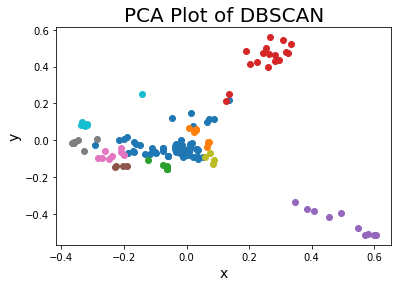

In [56]:
cl.get_2D_vec(x,'tfidf','PCA')
c_lab = cl.get_cluster_labels('DBSCAN')
cl.plot2D()

In [57]:
news_IT['c_lab'] = c_lab.tolist()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
for labs in pd.Series(c_lab).unique().tolist():
    print(labs)
    display(news_IT[news_IT['c_lab']==labs]['title'])
    print("="*100)

0


59            미래에셋의 야심작 '클라우드 ETF'
69    미래에셋 미국 운용사, 클라우드 컴퓨팅 ETF 상장
71    미래에셋, 美 나스닥서 클라우드 컴퓨팅 ETF 상장
75    미래에셋 美 운용사 글로벌X, 클라우드 ETF 상장
Name: title, dtype: object

-1


127            미래에셋대우, 전략 선택 가능한 `Global X 포트폴리오 자문형랩` 출시
128       미래에셋대우, 두 가지 전략 선택 가능한 `Global X 포트폴리오 자문형랩` 출시
131                           미래에셋대우, 글로벌 X 포트폴리오 자문형랩 출시
383                      온라인 펀드 8700억원 돌파…미래에셋대우, 증권업계 1위
394               미래에셋대우, 온라인전용펀드 설정액 8700억원 돌파…"증권업계 1위"
479                        미래에셋대우 계좌 새로 개설하고 QM6 받은 투자자는?
497                                    미래에셋생명, 특별관계자 지분변동
634               "삼성전자, 1분기 영업익 종전보다 6.1% 하향 조정"<미래에셋대우>
653                  미래에셋대우, 무료 온라인 서비스 '엠클럽' 가입자 10만명 돌파
654                          미래에셋대우, `m.Club` 가입자 10만명 돌파
718                              미래에셋박현주재단, 이중언어교재 전자책 개발
719                              미래에셋박현주재단, 이중언어교재 전자책 개발
834                     미래에셋대우, 최소가입액 10만원 ELS 출시기념 행사 실시
922               미래에셋은퇴연구소, 제7회 ‘찾아가는 행복한 은퇴 발전소’ 세미나 개최
1076                                   미래에셋생명, 특별관계자 지분변동
1176                        미래에셋대우, 테슬라 1호 '카페24' 상장주관 성과
1480                      미래에셋대우, 해외선물옵션 수수료 2.19달러 행사 실시
1897          

1


1138            미래에셋대우, 25일 전자투표 시스템 `플랫폼 V` 설명회
1143            미래에셋대우, 25일 전자투표 시스템 `플랫폼 V` 설명회
1157          미래에셋대우, 전자투표 시스템 `플랫폼 V` 오픈…설명회 개최
1285       미래에셋대우, '무료' 전자투표시스템 '박차'…"성공주총 만들 것"
1958    미래에셋대우 전자투표 V플랫폼 '무료'에도 상장사들 단독 사용은 '고민'
3414                        미래에셋, 주총 전자투표 무료 서비스
Name: title, dtype: object

2


2013                      미래에셋-네이버, 인도네시아 업체에 투자
2020    미래에셋-네이버, 인도네시아 온라인마켓 '부깔라팍'에 5000만달러 투자
2022    미래에셋-네이버 펀드, 인니 유니콘기업 부깔라팍에 5000만달러 투자키로
2026              미래에셋-네이버, 인도네시아 기업에 5000만달러 투자
5419          [IR 리포트]미래에셋, 상반기에만 글로벌투자 1조6000억원
5574                  미래에셋·네이버, 동남아판 우버 '그랩'에 투자
5576              승차공유 막힌 韓벤처 대신 네이버·미래에셋, 그랩키운다
5583                 미래에셋·네이버, 그랩에 1억5000만불 투자한다
5584                미래에셋, 네이버와 '그랩'에 1억5000만弗 투자
8690        [경제 브리핑] 미래에셋, 중국 승차공유 앱 에 2800억원 투자
8889                 네이버·미래에셋 2000억 '스타트업 펀드' 조성
8896                  미래에셋-네이버 ‘아시아 스타트업’ 발굴 나선다
8897          네이버, 미래에셋과 2000억 펀드 조성…아시아 스타트업 투자
8901               미래에셋·네이버 손잡고 2000억 스타트업 펀드 조성
8909      미래에셋·네이버, 2000억 규모 펀드 조성해 아시아 스타트업에 투자
8910           미래에셋, 네이버와 아시아 스타트업 투자펀드 2000억 조성
8922              네이버, 미래에셋과 2천억 펀드 조성…亞 스타트업 투자
Name: title, dtype: object

3


3773          미래에셋대우, `핀테크 파트너십 프로그램 1기 성과 발표회’ 성황리 마쳐
6780                      미래에셋대우, `미래에셋 디지털 혁신 플랫폼` 출범
6832            미래에셋대우 '핀테크 허브' 출범… KOTRA 등 12개 기관과 제휴
6835                             미래에셋대우, 디지털 혁신 플랫폼 출범
6839              미래에셋대우 "디지털 혁신 플랫폼 관련 핀테크 허브 업무 협약식"
6841                                미래에셋 디지털 혁신 플랫폼 출범
6845              핀테크 기업과 함께 성장하는 '미래에셋 디지털 혁신 플랫폼' 출범
7298                        미래에셋대우, 디지털 혁신 플랫폼 홈페이지 개설
7300    미래에셋대우, 핀테크 허브 구축해 디지털 혁신 박차...'디지털 혁신 플랫폼 오픈'
7305                      미래에셋대우, `디지털 혁신 플랫폼` 홈페이지 오픈
Name: title, dtype: object

4


4624         PC 간편인증 서비스 미래에셋대우 첫 도입
4633           미래에셋대우, PC간편인증 서비스 도입
4644    미래에셋대우, 업계 최초 PC 간편인증 서비스 도입
4656    미래에셋대우, 업계 최초 PC 간편인증 서비스 도입
Name: title, dtype: object

5


4908      미래에셋대우, 막강한 글로벌투자 컨설팅…해외주식 자산 5조 돌파
7027              미래에셋대우 "해외주식자산 5조 돌파…업계 최초"
8400     미래에셋대우, 지난해 해외주식 추천 포트폴리오 평균 수익률 57%
8469      미래에셋대우, 독일-영국-캐나다 주식 온라인 재매매 서비스 실시
8473      미래에셋대우, 독일·영국·캐나다 주식 온라인 재매매 서비스 오픈
8476    미래에셋대우, 업계 첫 독일·영국·캐나다 주식 온라인 재매매 서비스
8479           미래에셋대우, 독일·영국·캐나다 주식 당일 매매 서비스
8835     미래에셋대우 ‘해외주식 거래 차별화’, 국내 첫 브라질 주식 거래
Name: title, dtype: object

6


6054    AI가 내 투자 돕는다면… 미래에셋대우가 선보인 ‘손 안의 PB’
6625                미래에셋대우, 개인연금 자문형 서비스 선보여
8465                 미래에셋대우, 로보포트·로보픽 서비스 시작
8467          미래에셋대우, '혼투' 어려울 땐 '로보포트, 로보픽'
8468                 미래에셋대우, 로보포트·로보픽 서비스 오픈
8470        미래에셋대우, 투자정보 서비스 '로보포트' '로보픽' 개시
Name: title, dtype: object

7


6318               미래에셋대우-네이버 사회공헌 협약
6326       미래에셋대우, 네이버 해피빈 활용 사회공헌 박차
6328    미래에셋대우 "네이버 해피빈과 사회공헌활동 업무협약"
6346      미래에셋대우-네이버, 사회공헌 활동 위한 업무협약
Name: title, dtype: object

8


6798                네이버페이서 미래에셋대우 CMA 개설
6799              미래에셋대우, CMA계좌 네이버페이 연결
6803    미래에셋대우, 네이버페이와 최대 연 3% CMA 통장 출시
6813     미래에셋대우-네이버페이, 최대 연 3% CMA 통장 출시
6820     미래에셋대우, 최대 연 3% 네이버페이 CMA 통장 출시
6825         미래에셋대우-네이버페이,연 3% CMA 통장 출시
6826          미래에셋대우, "네이버페이서 CMA 개설하세요"
Name: title, dtype: object

9


7950      미래에셋대우, 자산관리 플랫폼 잔고 1조 돌파
7960    미래에셋대우 "프리미어 글로벌랩 잔고 1조 돌파"
7967        미래에셋대우 프리미어 글로벌랩 1조원 돌파
8003    미래에셋대우, 프리미어 글로벌랩 잔고 1조원 돌파
Name: title, dtype: object

10


9382         미래에셋대우, 홍콩 '미투젠' IPO 주관…"내년 코스닥 입성"
9400                   미래에셋대우, 홍콩 게임사 미투젠 IPO 주관
9405    미래에셋대우, 미투젠 IPO 주관사 선정…"2019년 코스닥 입성 목표"
9413               미래에셋대우, 홍콩 게임사 미투젠 IPO 주관사 선정
Name: title, dtype: object

경제 카테고리 분류

In [59]:
vectorizer = ns.Vectorizer()
x,word = vectorizer.get_tfidf_vec(news_eco['content_tk'])

eps 를 입력하세요 : 
0.3
클러스터 내 최소 문서 수를 입력하세요
4
PCA DBSCAN


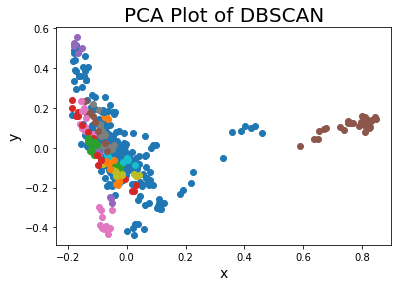

In [60]:
cl = ns.Get2DPlot()
cl.get_2D_vec(x,'tfidf','PCA')
c_lab = cl.get_cluster_labels('DBSCAN')
cl.plot2D()

In [61]:
news_eco['c_lab'] = c_lab.tolist()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
for labs in pd.Series(c_lab).unique().tolist():
    print(labs)
    display(news_eco[news_eco['c_lab']==labs]['title'])
    print("="*100)

-1


4                   미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼
5                       미래에셋대우-에트리홀딩스, 중소·벤처기업 성장지원 업무 협약
6                  미래에셋대우, 에트리홀딩스와 `중소·벤처기업 성장 지원` MOU 체결
22                   미래에셋자산운용, 단기채권 투자·주식 페어트레이딩 ‘쌍끌이 전략’
24                                     해외 부동산 쓸어담는 미래에셋대우
27            [마켓인사이트]투자실탄 끌어모으는 미래에셋대우, 또 다시 해외채권 발행 나선다
28                                  해외 부동산 투자 속도내는 미래에셋대우
51                           "미래에셋대우, 올해 실적 개선 기대…목표가 하향"
57                               미래에셋대우, '생명' 주식 매일 담는 까닭
90                          1위 턱밑추격 미래에셋 PBS, 상반기 삼성 추월하나
93                          1위 턱밑추격 미래에셋 PBS, 상반기 삼성 추월하나
98                     미래에셋證 PBS, 1위 ‘턱밑’ 추격에 시장이 긴장하는 이유
103                       미래에셋대우, 국내 선물·옵션 온라인 수수료 지원 이벤트
106                        미래에셋대우, 비대면 국내선물·옵션 온라인 수수료 지원
129                        미래에셋대우, 투자성향 따라 선택 가능한 자문형랩 출시
253                        미래에셋대우 2019 제1회 전국 자산관리 세미나 개최
259                    미래에셋대우, 9일 `핵심자산` 주제로 전국자산관리세미나 개최
263           

0


20               홍콩 오피스 빌딩에 2800억 투자한 미래에셋대우
23               홍콩 오피스 빌딩에 2800억 투자한 미래에셋대우
42    미래에셋, 홍콩 신흥업무지구 친환경건물 메자닌대출에 2800억원 투자
47          미래에셋대우, 홍콩 구룡반도 오피스빌딩에 2800억원 투자
50            미래에셋대우, 홍콩 구룡반도 오피스빌딩 2800억 투자
Name: title, dtype: object

1


21                미래에셋대우, 우량 헤지펀드에 분산투자, 변동성 장세에서 강점
642                미래에셋대우, 우수한 헤지펀드에 투자, 변동성 장세에서 강점
2365        [2019 유망 투자상품] 미래에셋대우 `미래에셋스마트헤지펀드셀렉션펀드`
7326                          미래에셋대우, 분산투자 ‘스마트헤지펀드’
7760      [코스닥 벤처펀드] 미래에셋대우, 최소 500만원으로도 사모펀드에 투자 가능
9163    [채권 투자 전략] 미래에셋대우, 문턱 낮아진 헤지펀드 투자… 조정장서도 안정적
9276            [증권사 추천상품] 미래에셋대우 / 미래에셋스마트헤지펀드셀렉션펀드
Name: title, dtype: object

2


192    미래에셋대우, ELW 수수료 면제 이벤트 나서
193     미래에셋대우, ELW 매매수수료 면제 이벤트
195    미래에셋대우, ELW 무료 수수료 이벤트 실시
197     미래에셋대우, ELW 무료 수수료 행사 실시
Name: title, dtype: object

3


378    미래에셋대우 온라인전용 펀드, 설정액 8700억 돌파… 업계 1위
380    미래에셋대우 온라인전용 펀드, 설정액 8700억 돌파… 업계 1위
388    미래에셋대우, 온라인전용 펀드 설정액 8700억원 돌파…업계 1위
391       미래에셋대우, 온라인 펀드시장에서도 설정액 증권업계 '1위'
Name: title, dtype: object

5


538     미래에셋생명, 신임 대표이사에 변재상 사장 선임
1137      [경제계 인사]미래에셋생명 변재상 사장 내정
1140      미래에셋생명 사장에 변재상 미래에셋대우 사장
1141        [인사] 변재상 미래에셋생명 대표에 내정
1147                 변재상 미래에셋생명 사장
1149             미래에셋생명 사장에 변재상 내정
1154        미래에셋생명, 변재상 대표이사 사장 내정
1163        미래에셋생명, 변재상 대표이사 사장 내정
1165        미래에셋생명, 변재상 신임 대표이사 내정
Name: title, dtype: object

4


632           미래에셋대우, 지수형 ELS·달러 청약 DLB 등 9종 판매
836          미래에셋대우, 최소가입금액 10만원인 온라인 전용 ELS 출시
1416              미래에셋대우, 低낙인 ELS 등 투자상품 11종 판매
2085             미래에셋대우, 달러 청약 ELS 등 투자상품 9종 판매
2434     미래에셋대우, 低낙인 ELS·달러 청약 DLB 등 투자상품 7종 판매
2435          미래에셋대우, 달러로 청약하는 DLB 등 파생상품 7종 판매
2768    미래에셋대우, 양방향 수익 추구·손실시 실물 지급 등 ELS 8종 모집
2788                 미래에셋대우, 양방향 수익 추구 ELS 등 판매
2922      미래에셋대우, 손실 발생 구간서 기초자산 실물 주는 ELS 판매 중
2937              미래에셋대우, 손실시 해외주식 실물 지급 ELS 판매
3138                       미래에셋대우, 주가연계증권 6종 판매
3950                       미래에셋대우, 주가연계증권 9종 판매
4210          미래에셋대우, 손실나면 해외주식 주는 ELS 등 10종 판매
4536    미래에셋대우, 손실나면 해외주식 지급 '글로벌 ELS' 등 12종 판매
4671        미래에셋대우, 손실 나면 해외주식 지급 ELS 포함 12종 판매
4672                      미래에셋대우, 주가연계증권 12종 판매
4795          미래에셋대우, 손실 나면 해외주식 실물 지급 ELS 등 판매
4950                    미래에셋대우, 주가연계증권 총 10종 판매
4951              미래에셋대우, 손실나면 해외주식 지급 ELS 등 판매
5722          미래에셋대우, 손실제한 조기상환 글로벌 ELS 등 6종 판매
5911                          미래에셋대우, EL

6


2422              미래에셋대우, 아마존 물류센터 878억에 인수
2424    대체투자 늘리는 미래에셋대우, 아마존 물류센터에 880억원 투자
2426              미래에셋대우, 아마존 물류센터 878억에 인수
2428          미래에셋대우, 아마존 신설 물류센터 900억원에 인수
2429                  미래에셋대우, 美 아마존 물류센터 인수
2432                  미래에셋대우, 美아마존 물류센터 품었다
2438             미래에셋대우, 아마존 물류센터 878억원에 인수
2439        미래에셋대우, 아마존 신설 물류센터 7800만달러에 인수
2441        미래에셋대우, 美 애틀란타 '아마존' 신설 물류센터 인수
2442           미래에셋대우, 아마존 신설 물류센터 인수 작업 완료
Name: title, dtype: object

7


2671     [증권사 추천상품] 미래에셋대우 / 미래에셋배당프리미엄 펀드
4086     [유망 배당주펀드] 미래에셋대우 / 미래에셋배당프리미엄 펀드
7197     [증권사 추천상품] 미래에셋대우 `미래에셋 배당프리미엄증권`
7544    [착한기업 투자가 뜬다] 미래에셋 / 미래에셋배당프리미엄 펀드
Name: title, dtype: object

8


2704    미래에셋대우-저축은행중앙회, 랩어카운트내 저축은행 예금 편입 업무협약
2705            미래에셋대우, 랩어카운트에 저축은행 정기예금 편입 추진
2706         미래에셋대우, 증권사 최초 '랩어카운트'에 저축銀 예금 편입
2708     미래에셋대우, 랩어카운트에 저축은행 정기예금 편입 위한 MOU 체결
Name: title, dtype: object

9


3064      미래에셋대우 조직개편…총괄직 신설 및 IB·트레이딩 강화
3067                미래에셋대우, IB·트레이딩 조직 강화
3077       미래에셋대우, 조직개편 단행…총괄대표직 신설·IB 강화
3079    미래에셋대우, 조직개편…IB·트레이딩 리스크 관리 강화 중점
Name: title, dtype: object

10


3143    [한경로보뉴스] '컨버즈' 5% 이상 상승, 이 시간 매수 창구 상위 - 미래에셋,...
6341    [한경로보뉴스] '대한제당3우B' 20% 이상 상승, 키움증권, 미래에셋 등 매수 ...
7042    [한경로보뉴스] '컨버즈' 5% 이상 상승, 이 시간 매수 창구 상위 - 삼성증권,...
7304    [한경로보뉴스] '미래에셋대우스팩1호' 52주 신고가 경신, 미래에셋, 키움증권 등...
Name: title, dtype: object

11


3147                          [경제계 인사]미래에셋대우 外
3204                               [인사] 미래에셋그룹
3205               [인사] 미래에셋그룹 ; 국토교통부 ; 환경부 등
3206    미래에셋금융그룹, 임원 승진 인사…"각사 독립 경영, IB사업 보강"
3255                               [인사] 미래에셋그룹
Name: title, dtype: object

12


3161                    미래에셋 부회장 조웅기-최경주씨
3163            미래에셋, 국내 경영 5인 부회장 체제로 구축
3168                미래에셋그룹, 5인 부회장 책임경영체제
3170     미래에셋대우 조웅기·미래에셋운용 최경주 사장, 부회장 승진
3172                          [인사] 미래에셋그룹
3173    미래에셋그룹 임원 인사…조웅기·최경주 사장, 부회장으로 승진
3174            미래에셋그룹, 조웅기·최경주 사장 부회장 승진
3177                미래에셋그룹, 부회장 등 임원인사 단행
Name: title, dtype: object

13


3826                    미래에셋대우, 사회적책임委 설치
3837                  미래에셋대우, 사회적책임위원회 설치
3838         미래에셋대우, 사회공헌강화위해 사회적책임위원회 출범
3840    미래에셋대우, 소비자보호·사회공헌 강화 '사회적책임委' 출범
Name: title, dtype: object

14


5218           베트남에서 '방카슈랑스 명가' 노리는 미래에셋생명
7546    통합 미래에셋프레보아생명 출범… "글로벌 금융그룹 역할 강화"
7549                   미래에셋생명, 베트남 합작법인 출범
7572           미래에셋생명, 베트남 프레보아생명과 통합법인 출범
Name: title, dtype: object

15


5354             미래에셋대우, 업계 최초 연금자산 11조원 돌파
5365            미래에셋대우, 증권업 최초 연금자산 11조원 돌파
5395              미래에셋대우 연금자산, 업계 첫 11조원 돌파
6705                        미래에셋대우 연금자산관리센터
6706               미래에셋대우, 개방형 연금자산관리센터 문열어
6708     미래에셋대우, 누구나 이용 가능한 개방형 연금자산관리센터 출범
6711                미래에셋대우, 개방형 연금자산관리센터 출범
6712    미래에셋대우, 개방형 연금자산관리센터 출범…"누구나 이용 가능"
6731         미래에셋대우, "개방형 연금자산관리센터, 전국민 이용"
7990                    미래에셋대우, 연금 비즈니스의 강자
Name: title, dtype: object

16


5435                           미래에셋대우 상반기 최대 실적
5440          미래에셋대우, 2Q 영업익 21.8%↑…반기 최대 실적 달성
5442       미래에셋대우, 상반기 영업익 4276억·순익 3578억…사상 최대
5443      미래에셋대우, 올 상반기 영업이익 4276억원…사상 최대 실적 경신
5445         미래에셋대우 상반기 영업익 4276억…"사상 최대 반기 실적"
5446           미래에셋대우, 2분기 순이익 1571억원…전년比 4.0%↓
5463    미래에셋대우, 상반기 영업익 4276억원...연 1兆 목표까지 '성큼'
Name: title, dtype: object

17


7223        미래에셋대우, 3년간 배당 25% 이상 유지
7224     미래에셋대우 "3년간 배당성향 최소 25% 유지"
7225     미래에셋대우, 3년간 최소 25% 배당 성향 유지
7226       미래에셋대우, "3년간 배당성향 25% 이상"
7228      미래에셋대우 "3년간 배당성향 25% 보장한다"
7229    미래에셋대우, "3년간 배당성향 최소 25% 보장"
7230     미래에셋대우 "3년간 배당성향 최소 25% 유지"
7243     미래에셋대우 "3년간 배당성향 최소 25% 보장"
Name: title, dtype: object

18


7261                   미래에셋대우, 올해 300명 채용
7267    미래에셋대우, 올해 300명 채용…"연말엔 4900명 육박"
7268              미래에셋대우, 올 하반기 150명 채용한다
7270               미래에셋대우, 하반기 150명 채용 예정
7274                  미래에셋대우, 올해 300명 뽑는다
Name: title, dtype: object

23


7324          박현주, 미래에셋대우 글로벌 경영에 주력…회장서 물러나
8908              [인사] 박현주 미래에셋대우 홍콩법인 회장 취임
8925        박현주, 해외사업에 주력… 미래에셋대우 홍콩법인 회장 취임
8933                 박현주 미래에셋대우 홍콩 글로벌 회장 취임
8949    박현주, 미래에셋대우 홍콩 글로벌 회장 취임…"글로벌 경영 주력"
8950                박현주, 미래에셋대우 홍콩 글로벌 회장 취임
Name: title, dtype: object

19


8162                5조원대 홍콩빌딩 인수에 미래에셋대우 3200억 투자
8183                        미래에셋, 홍콩 더센터 빌딩 인수 참여
8188    미래에셋대우, 리카싱 소유 홍콩 더센터 빌딩 인수 참여…3억불 투자(상보)
8196                 미래에셋대우, '더센터' 빌딩 인수에 3억달러 투자
8205        미래에셋대우, 리카싱 소유 홍콩 더센터 빌딩 인수 참여…3억불 투자
8207          미래에셋대우, 5.5조원 규모 홍콩 '더센터' 빌딩 인수전 참여
8210                       미래에셋대우, 홍콩 `더센터` 빌딩 인수
Name: title, dtype: object

20


8424               미래에셋대우, 자사주 800만주 매입 후 소각
8428               미래에셋대우, 자사주 800만주 취득 후 소각
8429                 미래에셋대우, 자사주 800만주 매입 소각
8430    미래에셋대우, 통큰 주주환원…자사주 800만주 매입 후 소각 결정
8434           미래에셋대우, 보통주 자사주 800만주 취득 후 소각
8440               미래에셋대우, 자사주 800만주 취득 및 소각
Name: title, dtype: object

21


8712      미래에셋, 글로벌 유니콘기업 디디추싱에 2800억 투자
8713      미래에셋, ‘중국의 우버’ 디디추싱에 2,800억 투자
8714    미래에셋, 글로벌 유니콘 기업 디디추싱에 2800억원 투자
8718        미래에셋, 중국판 우버에 투자…디디추싱에 2800억
8728            미래에셋, 中 승차공유업체 '디디추싱' 투자
8729        미래에셋, 中 디디추싱에 투자…2800억 펀드 조성
8730    미래에셋, 글로벌 유니콘 기업 디디추싱에 2800억원 투자
Name: title, dtype: object

22


8912          미래에셋대우, 최현만 수석부회장 재선임…"글로벌 경쟁력 강화"
8916           [주총현장] 미래에셋대우, 최현만 대표이사 수석부회장 재선임
8917                미래에셋대우, 최현만 수석부회장-조웅기 사장 재선임
8923    최현만 미래에셋 부회장 "연금은 최대 성장산업, 올해 13조로 키울 것"
Name: title, dtype: object

24


9318                         호반건설, 미래에셋대우 우선주에 500억 투자
9319                         호반건설, 미래에셋대우 우선주에 500억 투자
9322    [마켓인사이트] 미래에셋대우 유상증자 '구원투수'로… 호반베르디움, 500억원 투자
9323                        미래에셋대우 유상증자 호반건설, 500억원 참여
Name: title, dtype: object

25


9417    금융투자업계 베트남 진출 러시… 미래에셋자산, 현지 운용사 인수
9424         미래에셋자산운용, 베트남 `틴팟` 인수… 합작법인 설립
9426           미래에셋자산운용, 베트남투자공사와 합작 운용사 설립
9452          미래에셋운용, 베트남투자공사와 현지 합작 운용사 설립
9457    미래에셋운용, 베트남투자공사와 합작법인 설립…"동남아 전진기지"
Name: title, dtype: object

**결론**
* 전처리
    * 제목에 '미래에셋'을 포함한 문서 추출
    * 본문내 '미래에셋'이 3번이상 포함된 문서 추출 : 제목에 '미래에셋'을 포함했어도, 미래에셋에 관련하지 않은 문서 제거
* 카테고리 탐색
    * 카테고리는 cat1>cat2 의 list
    * 카테고리 리스트의 길이는 최대 3
    * 카테고리가 없는 문서도 있음(99개)
* 카테고리 선정 방법(1번 선택)
    * 1) cat1만 사용
        * cat1>cat2 => cat1 으로 변경
        * 각 카테고리 항목에 대해
            * 카테고리 리스트 내 '경제'외에 다른 카테고리를 포함한 있는 문서
                * 경제 외의 카테고리의 랭킹을 정한다( IT, 사회, 문화 등등)
                * 랭킹리스트에서 앞에 있는 카테고리를 문서의 카테고리로 선정한다.
            * 경제 카테고리만 포함한 문서
                * 경제로 설정
    * 2) 경제>cat2 에 있는 cat2 사용
* 군집화
    * 경제, IT에 대해 테스트해본 결과 적절하게 분류된다. eps와 min_docs를 적절히 설정해야함
    * min_docs 이하로 나오는 문서는 중요한 이슈가 아니라고 판단할 수 있음